<a href="https://colab.research.google.com/github/thangchu77/ML-projects/blob/main/Hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
#Preprocess the data: Mounting, convert data frame to np array, etc.
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/2. Linear regression/data_linear.csv')
X = data.iloc[:, 0].to_numpy().reshape(-1,1)
Y = data.iloc[:, 1].to_numpy().reshape(-1,1)
X = np.hstack((np.ones((X.shape[0],1)), X))

In [3]:
#Implementation of gradient descent algorithm
def GD(Xtrain, Ytrain, epochs, lr):
  weights = np.zeros((Xtrain.shape[1],1))
  cost = np.zeros((epochs, 1))
  for i in range(epochs):
    r = np.dot(Xtrain, weights) - Ytrain
    cost[i] = 0.5*np.sum(np.square(r))

    gradient = np.dot(Xtrain.T, r)
    weights -= lr * gradient

  return weights, cost


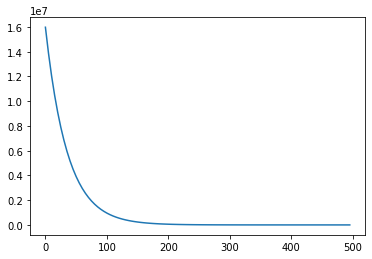

In [5]:
lr = [0.0000001, 0.00001, 0.0001]
epochs = 500
weights, cost = GD(X, Y, epochs, lr[0])

#Plot the graph with x-axis is the number of epochs and y-axis is the error
plot_epoch = []
plot_cost = []
for i in range(epochs):
  if i % 5 == 0:
    plot_epoch.append(i)
    plot_cost.append(cost[i])

plt.plot(plot_epoch, plot_cost)

predictions = np.dot(X, weights)


In [7]:
#With new input data, calculate the output price
#Notice that the gradient is large due to new_data is randomly generated
new_data = np.random.rand(1,2)
new_X = new_data[:,0].reshape(-1,1)
new_Y = new_data[:,1].reshape(-1,1)
new_X = np.hstack((np.ones((new_X.shape[0],1)), new_X))

new_prediction = np.dot(new_X, weights)
r = new_prediction - new_Y
error = 0.5*(r)**2

gradient = np.dot(new_X.T, r)


In [ ]:
#Given the dataset of the parabola, how to fit the linear regression model
squaredata = pd.read_csv('/content/drive/MyDrive/Machine Learning/2. Linear regression/data_square.csv').values
Xsquare = squaredata[:,:1].reshape(-1,1)
Ysquare = squaredata[:,1].reshape(-1,1)
Xsquare = np.hstack((np.ones((Xsquare.shape[0],1)), Xsquare))
Xsquare = np.hstack((Xsquare, np.square(Xsquare[:,1].reshape(-1,1))))

#Normalizing the data
coefficient = [np.mean(Xsquare[:,2]), np.std(Xsquare[:,2])]
Xsquare[:,2] = (Xsquare[:,2] - coefficient[0])/coefficient[1]

#Using the original GD and plot we have
lr = 0.00001
epochs = 1000

NewSquareWeights, NewSquareCost = GD(Xsquare, Ysquare, epochs, lr)
Xsquare[:,2] = Xsquare[:,2] * coefficient[1] + coefficient[0]
NewSquarePrediction = np.dot(Xsquare, NewSquareWeights)
print(NewSquarePrediction)
print(Ysquare)
plt.plot(NewSquarePrediction)

Prove the following 

Suppose $J$ denotes as loss function for gradient descent, prove that

> $\frac{dJ}{dw} = X^T(XW - Y)$ 
> Without the loss of generality, notice that $\frac{dJ}{dw} = \begin{bmatrix} \sum_{i=1}^n (x_i\dot w - y_i) \\ \sum_{i=1}^n (x_i\dot w - y_i)x_i \end{bmatrix}$ = $\begin{bmatrix} x_1 ... x_n \end{bmatrix}$ 
X = $\begin{bmatrix} 1 & x_1 \\ 1 & x_2 \\ ... & ... \\ 1 & x_n\end{bmatrix}$, 
$X^T$ = $\begin{bmatrix}1 & 1 & ... & 1 \\ x_1 & x_2 & ... & x_n\end{bmatrix}$, W = $\begin{bmatrix}w_0 \\ w_1\end{bmatrix}$, Y = $\begin{bmatrix}y_1 \\ y_2 \\ ... \\ y_n \end{bmatrix}$

XW - Y = $\begin{bmatrix} w_0 + x_1\dot w_1 - y_1 \\ w_0 + x_2\dot w_1 - y_2 \\ ... \\ w_0 + x_n\dot w_1 - y_n \end{bmatrix}$
$X^T(XW - Y)$ = $\begin{bmatrix}1 & 1 & ... & 1 \\ x_1 & x_2 & ... & x_n\end{bmatrix}\begin{bmatrix} w_0 + x_1\dot w_1 - y_1 \\ w_0 + x_2\dot w_1 - y_2 \\ ... \\ w_0 + x_n\dot w_1 - y_n \end{bmatrix}$ = $\begin{bmatrix} \sum_{i=1}^n (x_i\dot w - y_i) \\ \sum_{i=1}^n (x_i\dot w - y_i)x_i \end{bmatrix}$







